###  데이타 분석

데이타 -> 필터링 -> 정제 -> 시각화 -> 분석


### 데이타 필터링

분석에 필요한 데이타를 거르는 작업

# 고속버스 데이타셋에서 인사이트를 도출

[예] 

1. 우승고속에 대한 데이타 필터링(추출)

2. 경부선에서 총이용인원이 1000명 이상인 데이타 필터링(추출)

3. 그 외 데이타를 찾아내시오

In [100]:
import pandas as pd

df = pd.read_excel('data/고속버스.xlsx') 
       # sheetname='highway'  encoding='cp949' 추가 안해도 실행  
df.head(5)  # 상위 5개만 보임

,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
0,우등,88선,광주,울산,327.8,412,7283,63.1
1,고속,88선,광주,울산,327.8,145,3050,46.7
2,우등,88선,광주,울산신복,327.8,164,545,11.9
3,고속,88선,광주,울산신복,327.8,70,311,9.9
4,우등,88선,광주,동대구,219.3,1369,21873,57.1


### 이용인원이 많은 노선 10개 검색

In [81]:
# 이용인원이 많은 노선 10개 검색

top = df.sort_values('총이용인원',ascending = 0)
top.head(10)




,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
23,고속,경부선,서울경부,천안,84.1,5213,185241,79.0
233,우등,호남선,서울호남,광주,290.8,7247,142422,70.2
18,고속,경부선,서울경부,안성,77.8,3541,99277,62.3
272,우등,호남선,서울호남,전주,202.6,5117,94089,65.7
205,고속,영동선,서울경부,이천,73.1,3071,79832,57.8
21,우등,경부선,서울경부,대전복합,153.2,3555,77759,78.1
31,우등,경부선,서울경부,청주,123.0,3705,77586,74.8
229,우등,호남선,서울호남,유성,155.7,3300,75421,81.6
20,고속,경부선,서울경부,평택,69.8,2770,72167,57.9
234,고속,호남선,서울호남,광주,290.8,2038,68510,74.7


[연습]

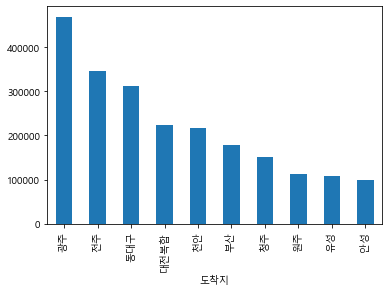

In [130]:
# 총 이용인원이 많은 인기 도착지 top 10
pop = df.groupby('도착지').sum().sort_values('총이용인원',ascending=0)[['총운행횟수','총이용인원']]
pop1 = pop.head(10)['총이용인원']

pop1.plot(kind = "bar")

In [80]:
# 우등버스  인기 도착지 top10
pop1 = df[df['차종'] == '우등'].groupby(['도착지']).sum().sort_values('총이용인원',ascending=0)[['총운행횟수','총이용인원']]
pop1.head(10)


,총운행횟수,총이용인원
도착지,,
광주,15684,281868
전주,11773,216970
동대구,12594,197055
부산,8906,128734
대전복합,7150,128704
청주,5086,94989
유성,3300,75421
진주,4896,74094
원주,3254,64746


In [79]:
#고속버스 인기 도착지 top10

pop2 = df[df['차종'] == '고속'].groupby(['도착지']).sum().sort_values('총이용인원',ascending=0)[['총운행횟수','총이용인원']]
pop2.head(10)

,총운행횟수,총이용인원
도착지,,
천안,7397,215998
광주,9567,187149
전주,5444,128713
동대구,5742,114489
안성,3541,99277
대전복합,2925,94320
이천,3071,79832
평택,2770,72167
여주,2040,56633


#### 고속버스 인기 노선과 우등버스 인기 노선 평균 거리를 비교하여, 거리와 차종의 인기도 상관관계 알아보기


In [123]:
#고속 버스 인기 노선 top 10,평균 거리

top[top['차종']=='고속'].sort_values('총이용인원',ascending=0).head(10)['거리'].mean()


127.59

In [119]:
#우등 버스 인기 노선 top 10,평균 거리
top[top['차종']=='우등'].sort_values('총이용인원',ascending=0).head(10)['거리'].mean()

198.39000000000001

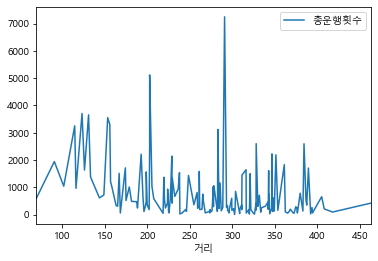

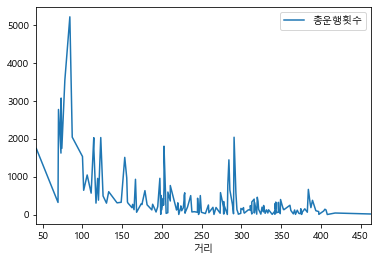

In [122]:
# 운행 거리별 우등/ 고속 운행 횟수
premium = df[df['차종'] == '우등'][['총운행횟수','거리']].sort_values('거리')
express = df[df['차종'] == '고속'][['총운행횟수','거리']].sort_values('거리')


%matplotlib inline
# 한글처리
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family='Malgun Gothic')

premium.plot(x='거리', y='총운행횟수',kind = 'line')
express.plot(x='거리', y='총운행횟수',kind = 'line')
